In [11]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
from collections import Counter
import seaborn as sns

In [27]:
def collect_metrics(root_dir):

    depth = 2

    dict_res_roberta = dict()
    dict_res_camem = dict()
    dict_res_xlm = dict()
    
    for subdir, dirs, files in os.walk(root_dir):
        if subdir[len(root_dir):].count(os.sep) < depth:
            for file_ in files:
                if file_ == "xai_metrics.json":
                    with open(subdir + "/" + file_) as f:
                        d = json.load(f)
                        log_odd = d["log_odd"]
                        anti_log_odd = d["anti_log_odd"]
                        
                    model_type = subdir.split(os.sep)[-1].split("_")[0]
                    if model_type == "roberta":
                        dataset_name = " ".join(subdir.split(os.sep)[-1].split("_")[1:])
                        dict_res_roberta[dataset_name] = {"log odd": log_odd, "anti log odd": anti_log_odd}
                    elif model_type == "camem":
                        dataset_name = " ".join(subdir.split(os.sep)[-1].split("_")[1:])
                        dict_res_camem[dataset_name] = {"log odd": log_odd, "anti log odd": anti_log_odd}
                    elif model_type == "xlm":
                        dataset_name = " ".join(subdir.split(os.sep)[-1].split("_")[1:])
                        dict_res_xlm[dataset_name] = {"log odd": log_odd, "anti log odd": anti_log_odd}

    return dict(sorted(dict_res_roberta.items())), dict(sorted(dict_res_camem.items())), dict(sorted(dict_res_xlm.items()))

def _average_dicts(dicts):
    avg_dict = collections.defaultdict(lambda: 0)
    
    for i, d in enumerate(dicts):
        for k, v in d.items():
            avg_dict[k] += v
        
    for k, v in avg_dict.items():
        avg_dict[k] /= (i+1)
    
    return avg_dict

def average_over_users(res):
    averaged_en = collections.defaultdict(list)
    averaged_it = collections.defaultdict(list)

    for k, v in res.items():
        if "en" in k and not ("nf" in k):
            averaged_en[" ".join(k.split(" ")[0:2])].append(v)
        elif "it" in k and not ("nf" in k):
            averaged_it[" ".join(k.split(" ")[0:2])].append(v)
    
    result_en = dict()
    result_it = dict()
            
    for k, v in averaged_en.items():
        result_en["avg en " + k] = _average_dicts(v)
        
    for k, v in averaged_it.items():
        result_it["avg it " + k] = _average_dicts(v)
                        
    return result_en, result_it

def process_to_present(res, column_width="1.1cm", plot_transpose=True):
    df_res = pd.DataFrame.from_dict(res).T
    # df_res = df_res.rename(columns=mapping_columns_names)
    if not plot_transpose:
        df_res = df_res.T
    s = df_res.style
    s.format(na_rep='MISS', precision=2)
    print(s.to_latex(column_format='l'+('p{'+f'{column_width}'+'}')*len(df_res.columns)))


def divide_p_np(res):
    out_p = {}
    out_np = {}
    
    for k, v in res.items():
        if "np" in k:
            out_np[k] = v
        else:
            out_p[k] = v
            
    return out_p, out_np

In [18]:
dict_res_roberta, dict_res_camem, dict_res_xlm = collect_metrics("../output/sst2_10_40")

## ROBERTA

In [19]:
avg, _ = average_over_users(dict_res_roberta)
roberta_results = {**dict_res_roberta, ** avg}

In [20]:
pd.DataFrame(roberta_results).T

,log odd,anti log odd
np f en49,-0.503767,-0.414716
np f en57,-0.366252,-0.667771
np f en6,-0.386056,-0.219160
np f en83,-0.316644,-0.708534
np f en98,-0.434014,-0.652388
np nf en,-0.218148,-1.363835
p f en49,-0.498173,-0.573231
p f en57,-0.416160,-0.613106
p f en6,-0.310865,-0.387680
p f en83,-0.471155,-0.398874


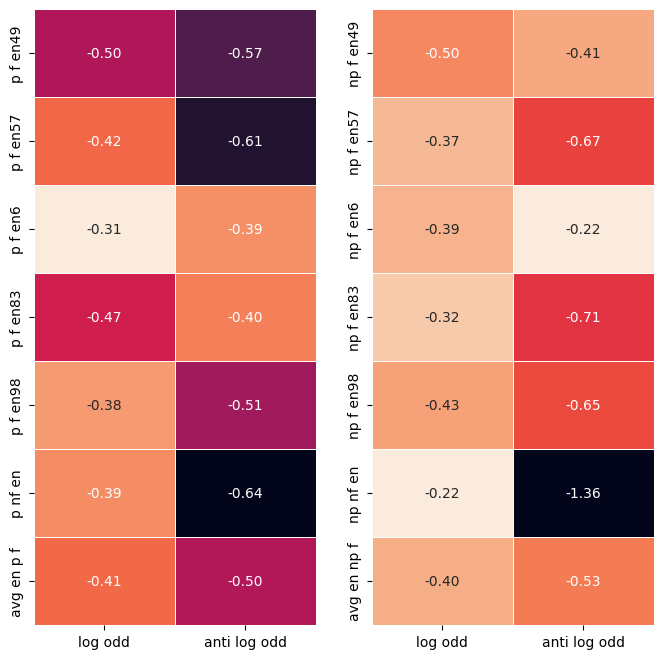

In [21]:
roberta_res_p, roberta_res_np = divide_p_np(roberta_results)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,8))
sns.heatmap(pd.DataFrame(roberta_res_p).T, annot=True, fmt=".2f", linewidth=.5, cbar=False, ax=ax1)
sns.heatmap(pd.DataFrame(roberta_res_np).T, annot=True, fmt=".2f", linewidth=.5, cbar=False, ax=ax2)
plt.show()

In [22]:
process_to_present(roberta_results)

\begin{tabular}{lp{1.1cm}p{1.1cm}}
 & log odd & anti log odd \\
np f en49 & -0.50 & -0.41 \\
np f en57 & -0.37 & -0.67 \\
np f en6 & -0.39 & -0.22 \\
np f en83 & -0.32 & -0.71 \\
np f en98 & -0.43 & -0.65 \\
np nf en & -0.22 & -1.36 \\
p f en49 & -0.50 & -0.57 \\
p f en57 & -0.42 & -0.61 \\
p f en6 & -0.31 & -0.39 \\
p f en83 & -0.47 & -0.40 \\
p f en98 & -0.38 & -0.51 \\
p nf en & -0.39 & -0.64 \\
avg en np f & -0.40 & -0.53 \\
avg en p f & -0.41 & -0.50 \\
\end{tabular}



## XLM

In [23]:
avg, _ = average_over_users(dict_res_xlm)
xlm_results = {**dict_res_xlm, ** avg}

In [24]:
pd.DataFrame(xlm_results).T

,log odd,anti log odd
np f en49,-0.700659,0.001764
np f en57,-0.626593,-0.051002
np f en6,-0.643162,-0.055239
np f en83,-0.716511,-0.029362
np f en98,-0.655847,-0.082400
np nf en,-0.444294,-0.669901
p f en49,-0.422125,-0.586324
p f en57,-0.088318,-0.212464
p f en6,-0.130721,-0.235747
p f en83,-0.111596,-0.300725


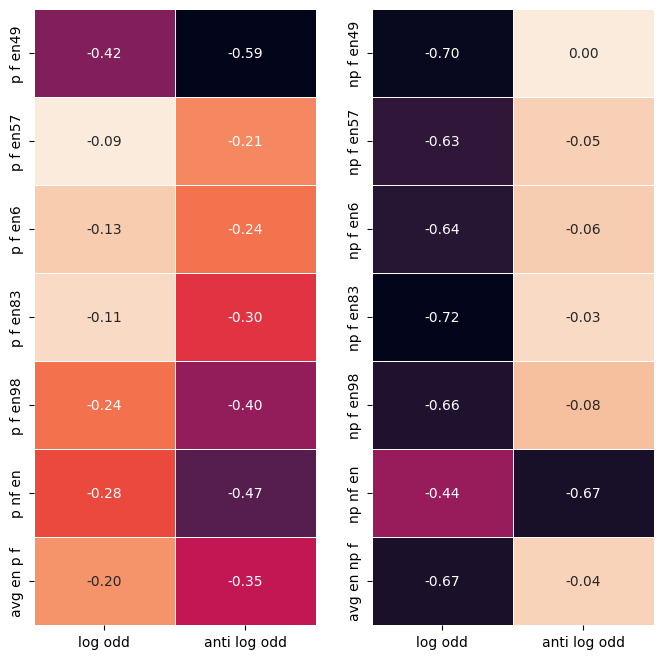

In [25]:
xlm_res_p, xlm_res_np = divide_p_np(xlm_results)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,8))
sns.heatmap(pd.DataFrame(xlm_res_p).T, annot=True, fmt=".2f", linewidth=.5, cbar=False, ax=ax1)
sns.heatmap(pd.DataFrame(xlm_res_np).T, annot=True, fmt=".2f", linewidth=.5, cbar=False, ax=ax2)
plt.show()

In [26]:
process_to_present(xlm_results)

\begin{tabular}{lp{1.1cm}p{1.1cm}}
 & log odd & anti log odd \\
np f en49 & -0.70 & 0.00 \\
np f en57 & -0.63 & -0.05 \\
np f en6 & -0.64 & -0.06 \\
np f en83 & -0.72 & -0.03 \\
np f en98 & -0.66 & -0.08 \\
np nf en & -0.44 & -0.67 \\
p f en49 & -0.42 & -0.59 \\
p f en57 & -0.09 & -0.21 \\
p f en6 & -0.13 & -0.24 \\
p f en83 & -0.11 & -0.30 \\
p f en98 & -0.24 & -0.40 \\
p nf en & -0.28 & -0.47 \\
avg en np f & -0.67 & -0.04 \\
avg en p f & -0.20 & -0.35 \\
\end{tabular}

